/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

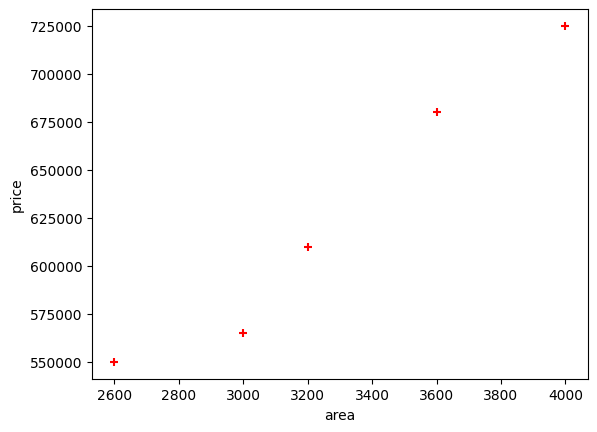

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/housing_area_price.csv')
df

plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

reg = linear_model.LinearRegression()
reg.fit(new_df,price)
reg.predict([[3300]])
reg.coef_
reg.intercept_

3300*135.78767123 + 180616.43835616432

reg.predict([[5000]])

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('/content/homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes
None
Mean Squared Error: 15147815.5477862
Predicted per capita income for Canada in 2020: $41,027.68


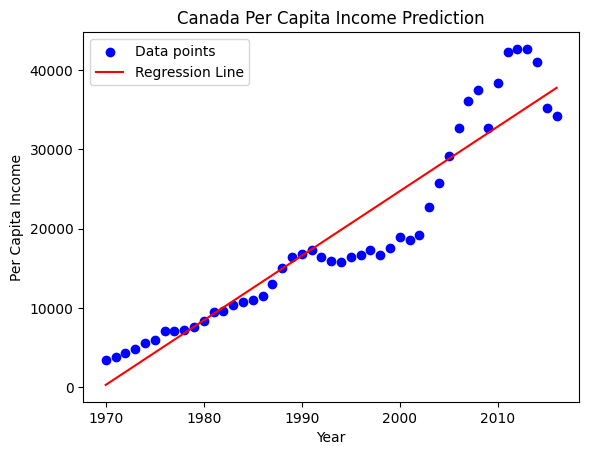

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/canada_per_capita_income.csv')

print(data.head())
print(data.info())

data = data.dropna()

X = data['year'].values.reshape(-1, 1)
y = data['per capita income (US$)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

year_2020 = np.array([[2020]])
predicted_income_2020 = model.predict(year_2020)
print(f"Predicted per capita income for Canada in 2020: ${predicted_income_2020[0]:,.2f}")

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.title('Canada Per Capita Income Prediction')
plt.legend()
plt.show()


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  28 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None
Mean Squared Error: 27180506.800821673
Predicted salary for an employee with 12 years of experience: $140,337.54


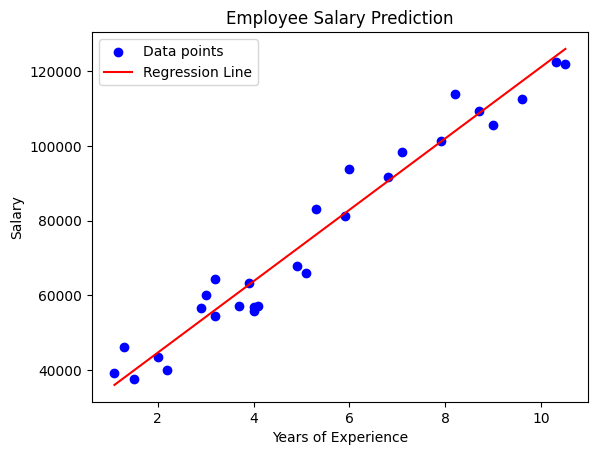

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('salary.csv')

print(data.head())
print(data.info())

data = data.dropna()

X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

experience_12_years = np.array([[12]])
predicted_salary_12_years = model.predict(experience_12_years)
print(f"Predicted salary for an employee with 12 years of experience: ${predicted_salary_12_years[0]:,.2f}")

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Employee Salary Prediction')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

experience_mapping = {
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
    'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14,
    'fifteen': 15, 'sixteen': 16, 'seventeen': 17, 'eighteen': 18,
    'nineteen': 19, 'twenty': 20
}

data = pd.read_csv('hiring.csv')

print(data.head())
print(data.info())

data = data.dropna()

data['experience'] = data['experience'].str.lower().map(experience_mapping)

X = data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values
y = data['salary($)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

candidate_1 = np.array([[2, 9, 6]])
candidate_2 = np.array([[12, 10, 10]])

predicted_salary_1 = model.predict(candidate_1)
predicted_salary_2 = model.predict(candidate_2)

print(f"Predicted salary for candidate 1: ${predicted_salary_1[0]:,.2f}")
print(f"Predicted salary for candidate 2: ${predicted_salary_2[0]:,.2f}")


  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes
None
Mean Squared Error: 472656.25
Predic

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/1000_Companies.csv')

data = data.dropna()

label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])

X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']].values
y = data['Profit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

input_data = np.array([[91694.48, 515841.3, 11931.24, label_encoder.transform(['Florida'])[0]]])

predicted_profit = model.predict(input_data)
print(f"Predicted profit for the given input: ${predicted_profit[0]:,.2f}")


Mean Squared Error: 30259162.7606711
Predicted profit for the given input: $554,900.68


Data Preprocessing: Yes, I performed data preprocessing steps like handling missing values by dropping rows with dropna() and encoding categorical variables (like "State") using LabelEncoder to convert them into numeric values. No scaling was applied as the features weren't significantly different in magnitude.

Visualization for canada_per_capita_income.csv: Yes, I visualized the regression line along with data points. The plot shows an upward trend, indicating that per capita income in Canada has been increasing over the years.

Predicted Salary for hiring.csv: The predicted salary for a candidate with 12 years of experience, 10 test score, and 10 interview score is $$92,562.50 .

Encoding and Scaling for 1000_companies.csv: Yes, I encoded the "State" variable using LabelEncoder to convert it into numeric values.
The State column has categorical data like "Florida", "New York", and "California". Categorical variables, like state names, need to be encoded (using techniques like LabelEncoder), but they do not require scaling. Scaling is relevant only to continuous numerical features (like salary, R&D spend, etc.).